In [1]:
import numpy as np
import os

In [3]:
## Load data
import json

with open("pill_dataset/medium_pilldataset/categories.json", "r") as f:
    categories = json.load(f)

In [4]:
noise_dict = {'clean':[],
              'bright':[],
              'cover':[],
              'zoom':[],
              }

In [5]:
for key in categories.keys():
    drug_dict = categories[key]
    for noise_type in drug_dict.keys():
        noise_dict[noise_type] += drug_dict[noise_type]

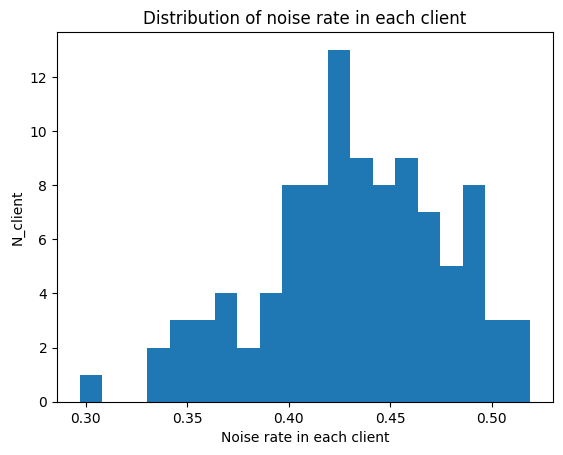

In [42]:
## Statistic nosie rate 

idx_name = "data_idx_alpha_100_cluster_20"
with open(f"pill_dataset/medium_pilldataset/100client/dirichlet/{idx_name}.json" , "r") as f:
    data_idx = json.load(f)


dict_noise_rate = {}
list_noise_rate = []
for client_id in data_idx.keys():
    client_idx =  data_idx[client_id]
    # print(client_idx)
    n_noise = 0
    list_noise = [i for i in client_idx if i not in noise_dict['clean']]
    n_noise = len(list_noise)
    noise_rate = n_noise * 1.0/ len(client_idx)
    dict_noise_rate[client_id] = noise_rate
    list_noise_rate.append(noise_rate)


import matplotlib.pyplot as plt 

plt.hist(list_noise_rate, bins=20)
plt.xlabel("Noise rate in each client")
plt.ylabel("N_client")
plt.title("Distribution of noise rate in each client")
plt.savefig(f"pill_dataset/medium_pilldataset/100client/dirichlet/noise_distribution/{idx_name}.png")

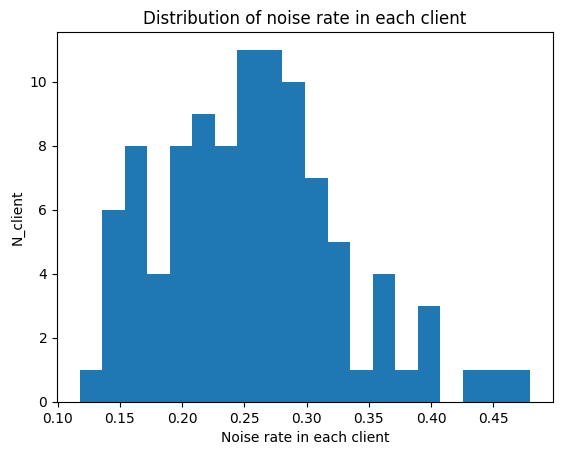

In [44]:
import pandas as pd 

df = pd.read_csv("pill_dataset/medium_pilldataset/100client/dirichlet/data_idx_alpha_100_cluster_20_stat.csv")

In [45]:
data_dis = df.values[:,1:]

In [46]:
n_sample_clients = data_dis.sum(-1)

In [47]:
n_sample_clients

array([111,  93, 112, 113,  90, 128, 122,  92,  87, 103,  85, 106, 117,
       108,  83,  94,  93, 103,  93, 119,  97, 107, 117, 117,  96,  97,
        97,  98, 114, 117, 117,  96, 103, 104, 110, 106,  97, 118, 100,
       100, 113, 102, 128,  91, 106, 110, 120, 121,  93,  98, 116, 109,
       107, 102, 122, 100, 114, 117, 106, 121,  97, 141, 108,  89, 117,
        89, 120,  97, 107, 121, 108,  95,  92,  98,  98, 111,  97,  90,
       100, 109, 104, 110,  99,  95,  95, 103, 138, 120,  82, 122,  99,
       117, 112,  89,  93, 121, 107, 105, 114,  97])

(array([ 2.,  1.,  1.,  3.,  3.,  7.,  4., 10.,  6.,  4.,  6.,  3.,  8.,
         5.,  5.,  4.,  3.,  9.,  2.,  7.,  3.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  1.,  1.]),
 array([ 82.        ,  83.96666667,  85.93333333,  87.9       ,
         89.86666667,  91.83333333,  93.8       ,  95.76666667,
         97.73333333,  99.7       , 101.66666667, 103.63333333,
        105.6       , 107.56666667, 109.53333333, 111.5       ,
        113.46666667, 115.43333333, 117.4       , 119.36666667,
        121.33333333, 123.3       , 125.26666667, 127.23333333,
        129.2       , 131.16666667, 133.13333333, 135.1       ,
        137.06666667, 139.03333333, 141.        ]),
 <BarContainer object of 30 artists>)

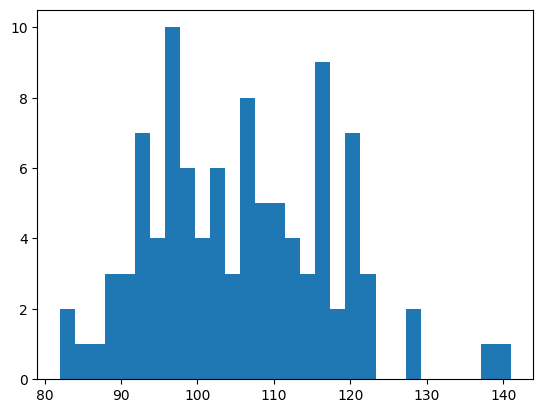

In [48]:
plt.hist(n_sample_clients, bins=30)